In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\GSE164378\Hao_PBMC_GSE_level2_rep_cells_onlyLog1p.h5ad")
adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Hao_PBMC_GSE164378.h5ad')
print('Original adata:', adata.shape)
label = adata.obs['celltype.l2'].tolist()
types = np.unique(label).tolist()
types = [s.replace(' ', '_') for s in types]
print('all cell types:', types)
print('====================')


Original adata: (161764, 33538)
all cell types: ['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_Proliferating', 'NK_CD56bright', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']


## Read features

In [3]:
import os
# os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_GSE\L2_by_lossdiff\feature_selection")
os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_GSE/L2_by_lossdiff/feature_selection')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [4]:
count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

,Feature_count,Positive_feature_count
ASDC,13,0
B_intermediate,19,8
B_memory,35,18
B_naive,8,4
CD14_Mono,15,9
CD16_Mono,11,6
CD4_CTL,111,42
CD4_Naive,124,63
CD4_Proliferating,96,53
CD4_TCM,56,28


(28, 2)


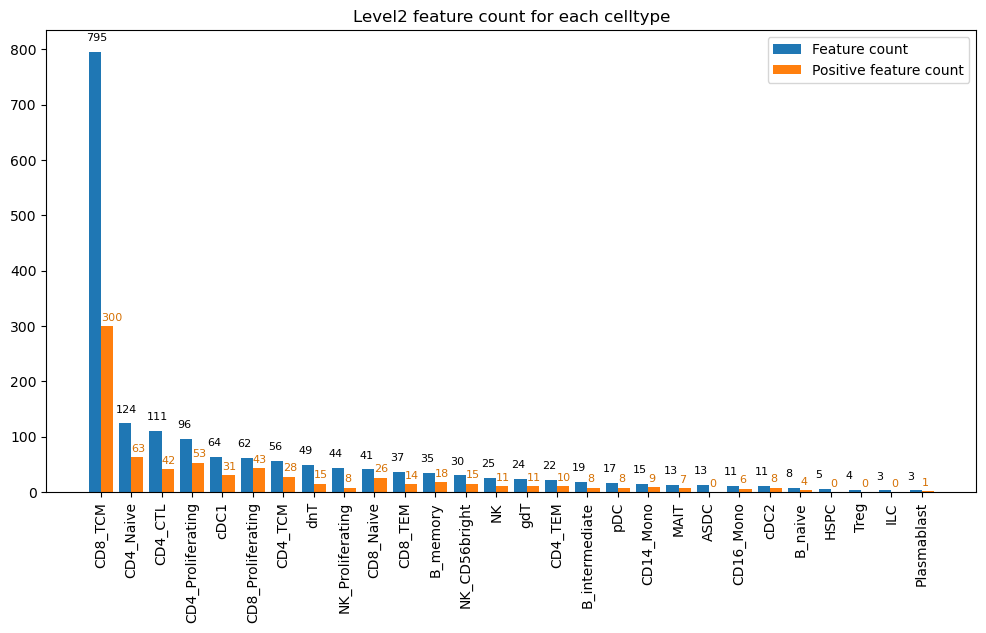

In [6]:
# Sort count_df by 'Feature_count' in descending order
count_df = count_df.sort_values('Feature_count', ascending=False)
# remove irrelevant celltypes
irrelevant = ['Doublet', 'Eryth', 'Platelet']
count_df = count_df.drop(irrelevant)
print(count_df.shape)

# plot barplot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.5, v+20, str(v), fontsize=8)
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i, v+10, str(v), fontsize=8, color='#d67002')

ax.set_xticks(x)
ax.set_xticklabels(count_df.index)
plt.xticks(rotation=90)
plt.title('Level2 feature count for each celltype')
ax.legend()
# plt.savefig('L2_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot cell number

In [9]:
counts

CD14 Mono            42690
CD4 Naive            17479
NK                   17173
CD4 TCM              14889
CD8 TEM              11727
CD8 Naive            10768
B naive               7718
CD16 Mono             6320
CD4 TEM               4282
gdT                   3649
B memory              3285
CD8 TCM               2883
MAIT                  2784
Treg                  2507
cDC2                  2501
B intermediate        2431
Platelet              2293
CD4 CTL               1736
NK_CD56bright          943
pDC                    861
Doublet                605
NK Proliferating       548
Plasmablast            366
dnT                    356
HSPC                   329
cDC1                   151
ILC                    132
CD4 Proliferating      108
CD8 Proliferating       91
Eryth                   83
ASDC                    76
Name: celltype.l2, dtype: int64

In [13]:
counts = adata.obs['celltype.l2'].value_counts()
order = count_df.index.tolist()
order = [s.replace('_', ' ') if s != 'NK_CD56bright' else s for s in order]
counts = counts[order]
counts

CD8 TCM               2883
CD4 Naive            17479
CD4 CTL               1736
CD4 Proliferating      108
cDC1                   151
CD8 Proliferating       91
CD4 TCM              14889
dnT                    356
NK Proliferating       548
CD8 Naive            10768
CD8 TEM              11727
B memory              3285
NK_CD56bright          943
NK                   17173
gdT                   3649
CD4 TEM               4282
B intermediate        2431
pDC                    861
CD14 Mono            42690
MAIT                  2784
ASDC                    76
CD16 Mono             6320
cDC2                  2501
B naive               7718
HSPC                   329
Treg                  2507
ILC                    132
Plasmablast            366
Name: celltype.l2, dtype: int64

In [12]:
sum(counts)

157840

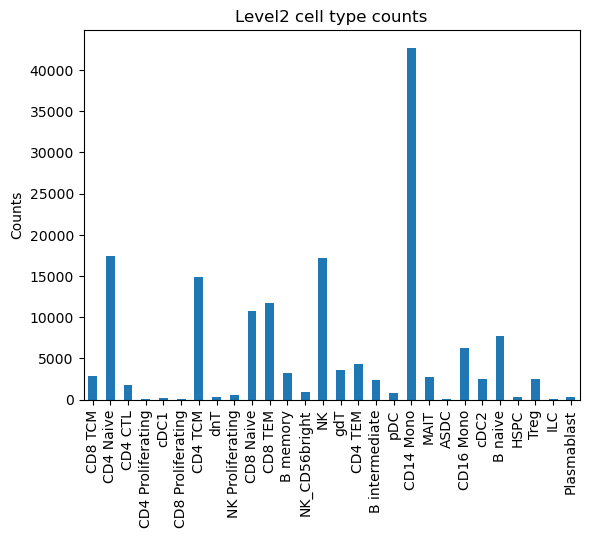

In [15]:
counts.plot(kind='bar')
plt.title('Level2 cell type counts')
plt.ylabel('Counts')
plt.show()